In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('loan_data.csv')

In [74]:
X = df.drop("loan_status", axis=1)  
y = df["loan_status"]

In [75]:
numerical_cols = [
    "person_age", "person_income", "person_emp_exp", "loan_amnt",
    "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"
]
categorical_cols = ["person_gender", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
education_col = ["person_education"]


In [76]:
education_order = [["High School", "Associate", "Bachelor", "Master" ,"Doctorate"]]

In [77]:
# Created preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

ordinal_pipeline = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=[["High School", "Associate", "Bachelor", "Master"]]))
])

In [78]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
education_transformer = OrdinalEncoder(categories=education_order)

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
        ("edu", education_transformer, education_col),
    ]
)

In [80]:
logistic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [81]:
decision_tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

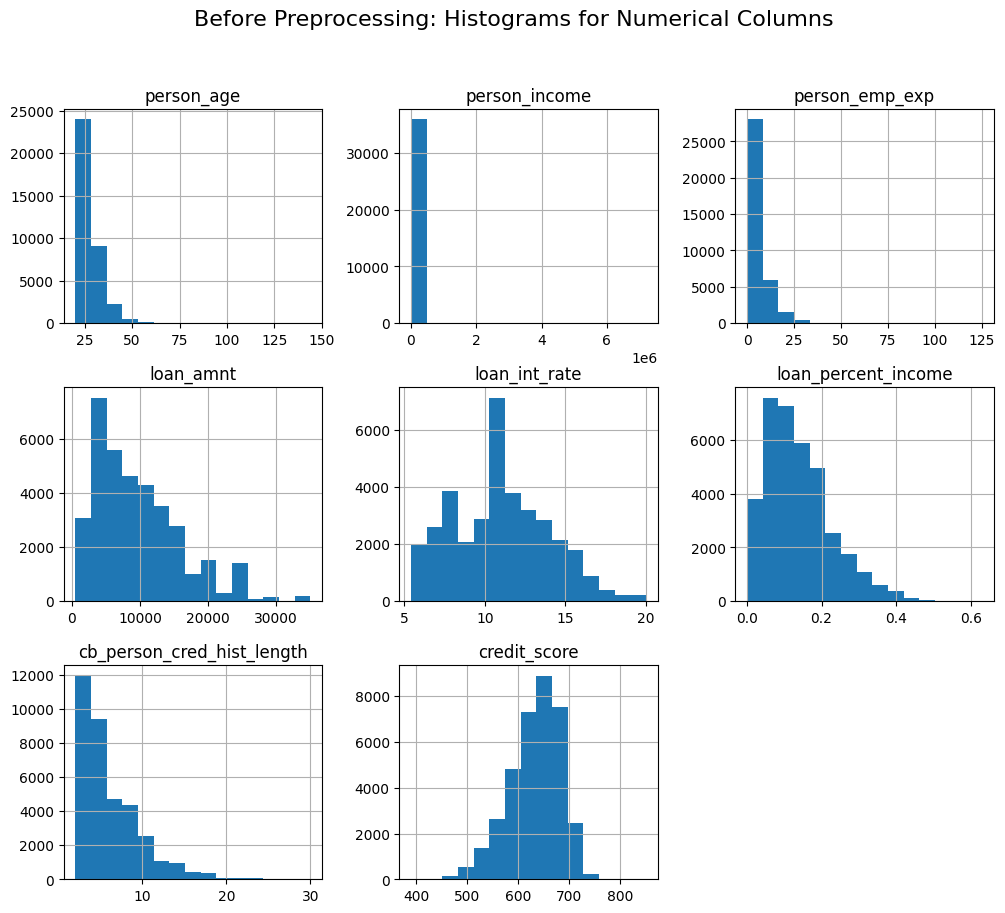

In [83]:
X_train[numerical_cols].hist(figsize=(12, 10), bins=15)
plt.suptitle('Before Preprocessing: Histograms for Numerical Columns', fontsize=16)
plt.show()

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\3124576838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="muted")


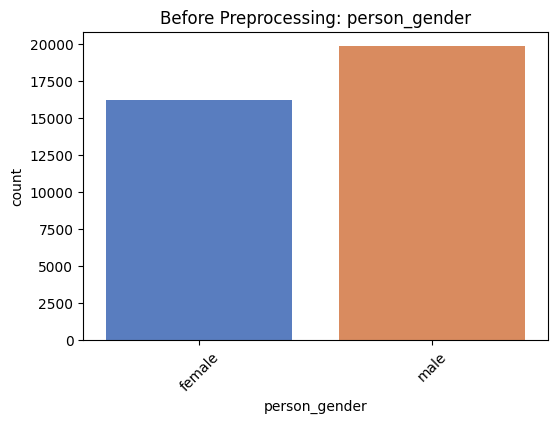

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\3124576838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="muted")


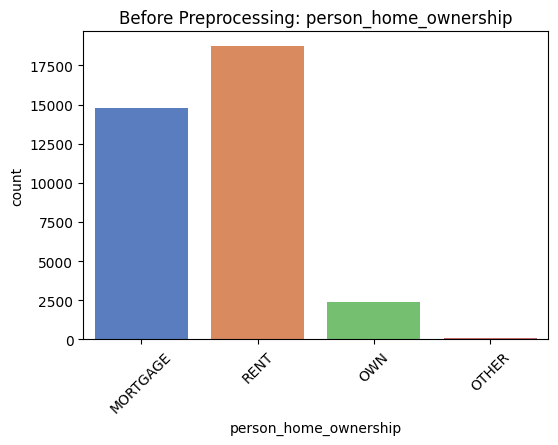

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\3124576838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="muted")


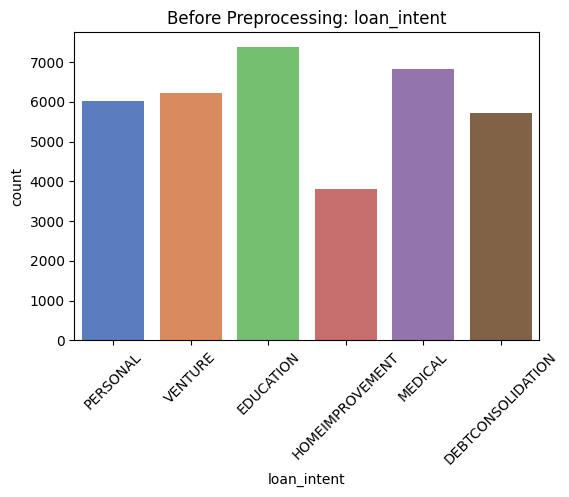

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\3124576838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="muted")


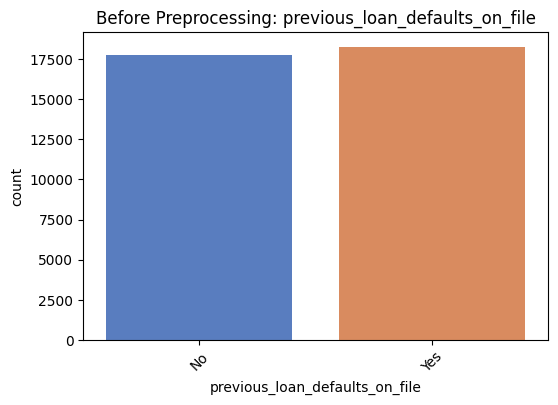

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\3124576838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="muted")


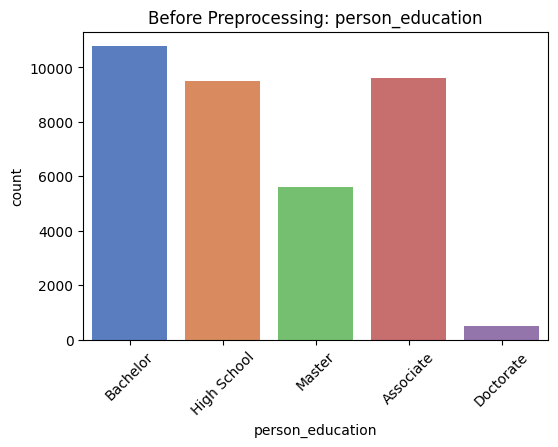

In [84]:
for col in categorical_cols + education_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_train, x=col, palette="muted")
    plt.title(f'Before Preprocessing: {col}')
    plt.xticks(rotation=45)
    plt.show()

In [85]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [86]:
numerical_transformed_df = pd.DataFrame(
    X_train_transformed[:, :len(numerical_cols)],  # Select only numerical columns
    columns=[f"scaled_{col}" for col in numerical_cols]
)

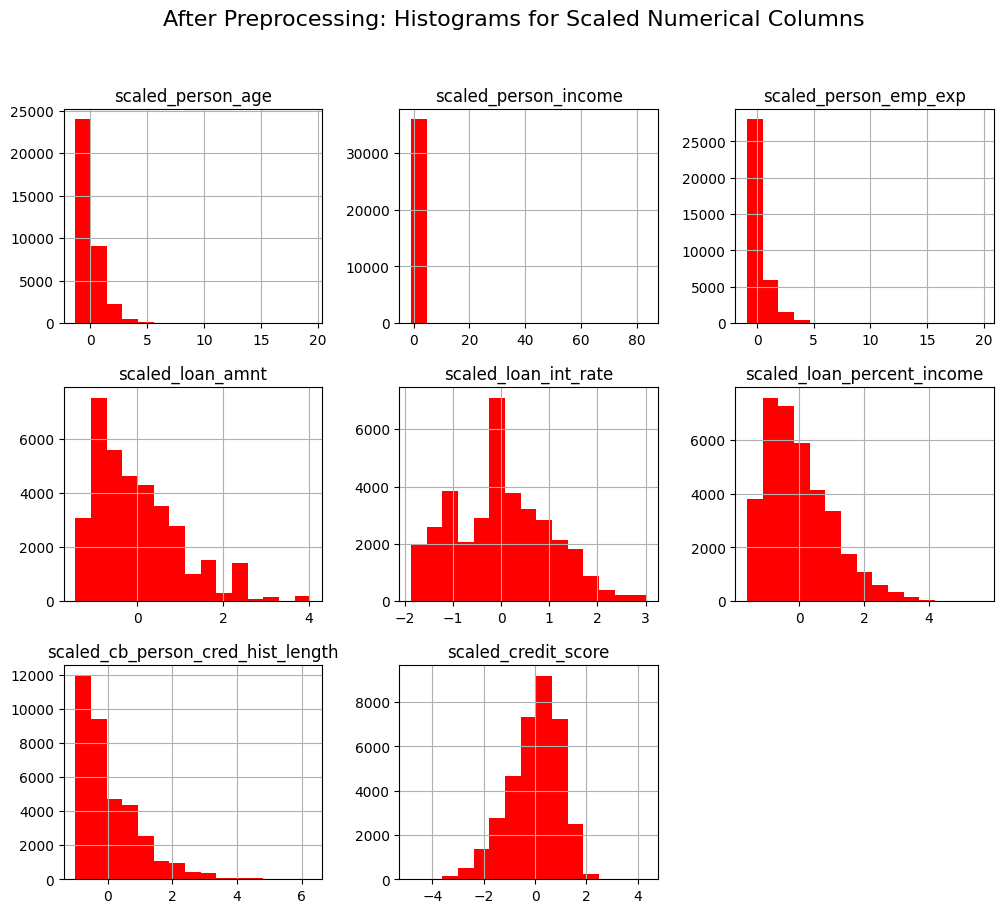

In [87]:
numerical_transformed_df.hist(figsize=(12, 10), bins=15, color="red")
plt.suptitle('After Preprocessing: Histograms for Scaled Numerical Columns', fontsize=16)
plt.show()

In [88]:
onehot_categories = preprocessor.named_transformers_["cat"].categories_
categorical_transformed_df = pd.DataFrame(
    X_train_transformed[:, len(numerical_cols):-1],  # Select one-hot encoded columns
    columns=[f"{col}_{val}" for col, categories in zip(categorical_cols, onehot_categories) for val in categories]
)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


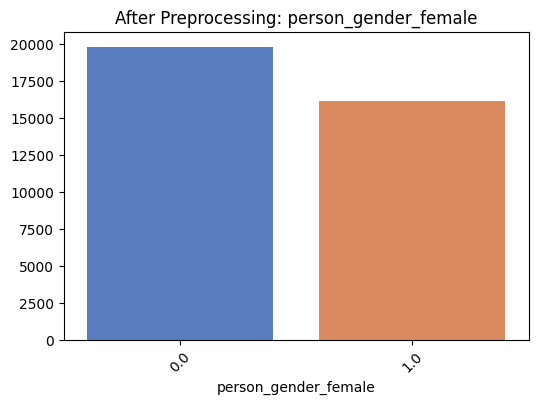

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


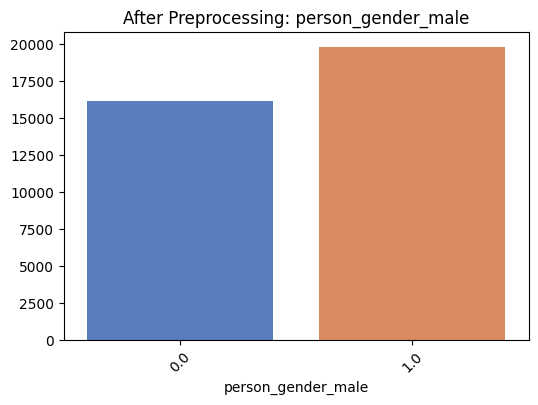

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


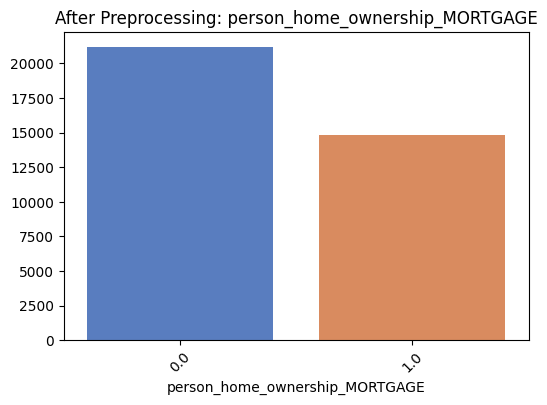

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


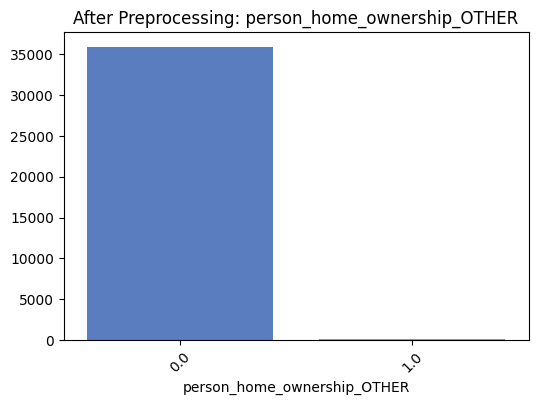

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


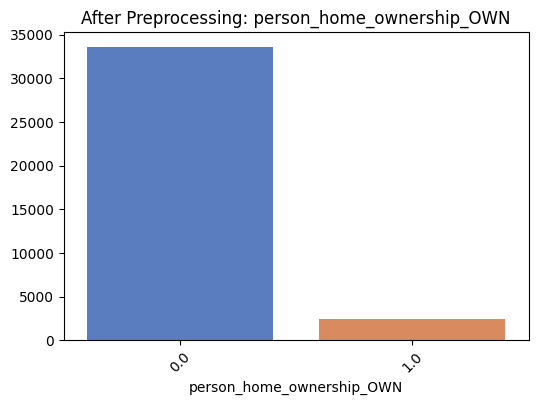

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


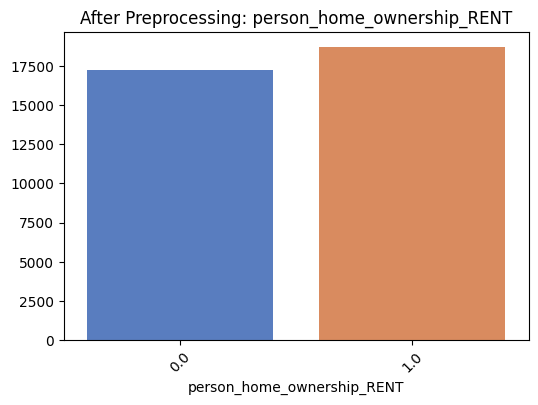

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


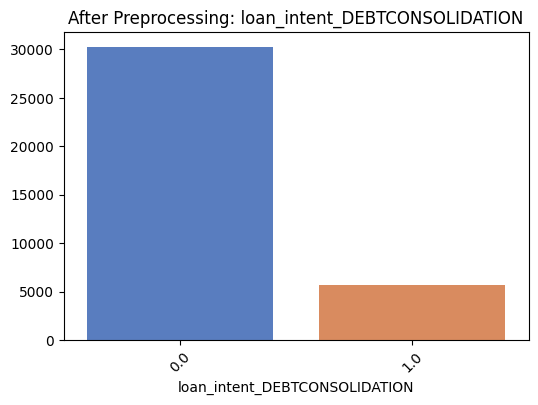

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


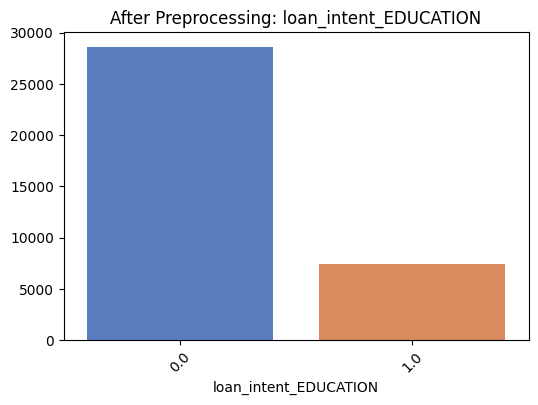

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


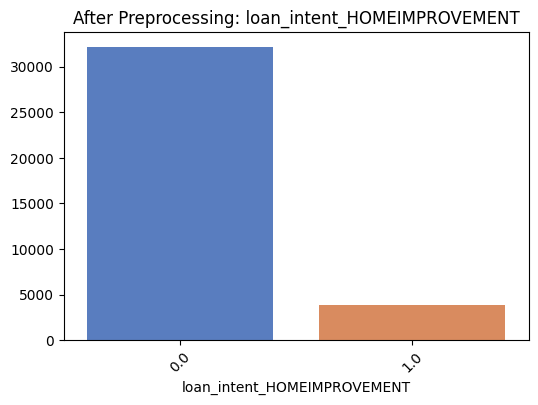

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


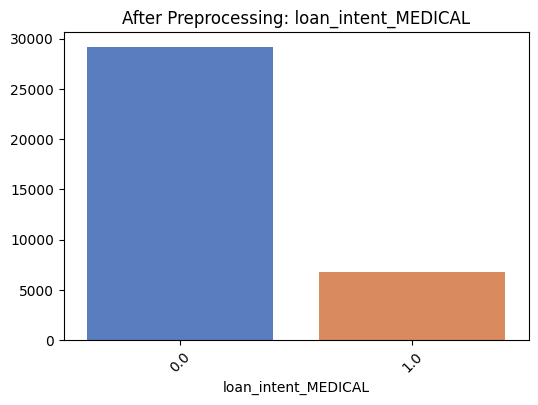

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


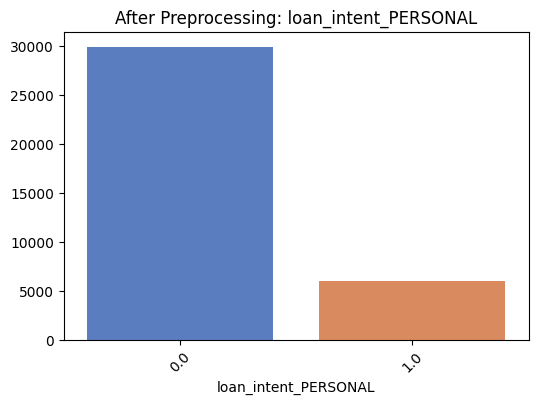

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


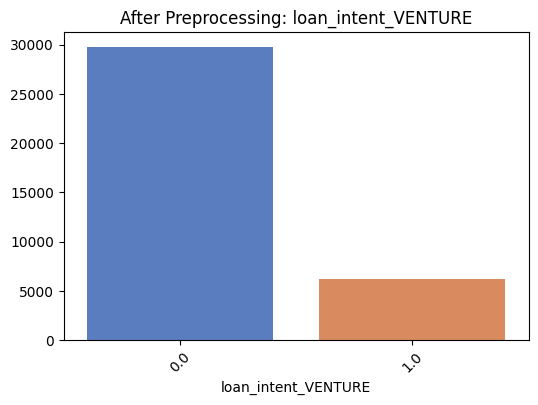

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


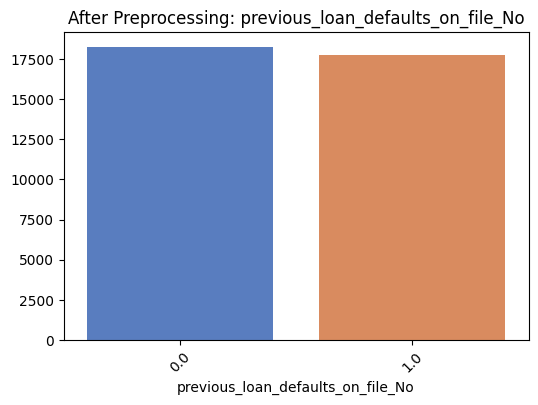

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\1149072486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")


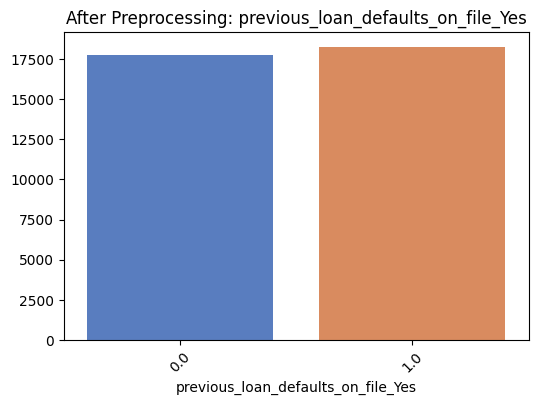

In [89]:
for col in categorical_transformed_df.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=categorical_transformed_df[col].value_counts().index, y=categorical_transformed_df[col].value_counts().values, palette="muted")
    plt.title(f'After Preprocessing: {col}')
    plt.xticks(rotation=45)
    plt.show()

In [90]:
ordinal_transformed_df = pd.DataFrame(
    X_train_transformed[:, -1],  # Select the ordinal encoded column
    columns=[f"encoded_{education_col[0]}"])

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_23296\2599218500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ordinal_transformed_df[f"encoded_{education_col[0]}"].value_counts().index,


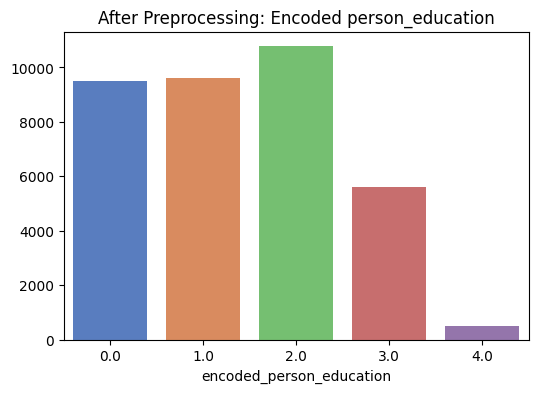

In [91]:
plt.figure(figsize=(6, 4))
sns.barplot(x=ordinal_transformed_df[f"encoded_{education_col[0]}"].value_counts().index,
            y=ordinal_transformed_df[f"encoded_{education_col[0]}"].value_counts().values,
            palette="muted")
plt.title(f'After Preprocessing: Encoded {education_col[0]}')
plt.show()

In [92]:
# Fitted and evaluated Logistic Regression
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

In [93]:
# Fitted and evaluated Decision Tree
decision_tree_pipeline.fit(X_train, y_train)
y_pred_tree = decision_tree_pipeline.predict(X_test)

In [94]:
# Classification Reports
print("Logistic Regression with Preprocessing:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression with Preprocessing:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [95]:
print("Decision Tree with Preprocessing:")
print(classification_report(y_test, y_pred_tree))


Decision Tree with Preprocessing:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6990
           1       0.77      0.80      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.87      0.86      9000
weighted avg       0.90      0.90      0.90      9000

